# Exploratory Analysis of Arabic Wikipedia Editions:

## Poor Content Quality:

### Lexical Richness/Diversity:

#### Moroccan Arabic Wikipedia:

In [1]:
from lexicalrichness import LexicalRichness

with open("../Wikipedia-20240101/arywiki-20240101/arywiki-20240101-pages-articles-multistream.txt", 'r') as file:
    text = file.read()
    file.close()

lex = LexicalRichness(text)
print(f"Words = {lex.words:,}")
print(f"Unique Words = {lex.terms:,}")
print(f"Type-Token Ratio (TTR) = {lex.ttr:,}")
print(f"Root Type-Token Ratio (RTTR) = {lex.rttr:,}")
print(f"Corrected Type-Token Ratio (CTTR) = {lex.cttr:,}")
print(f"Measure of Textual Lexical Diversity (MTLD) = {lex.mtld(threshold=0.72):,}")

Words = 1,154,058
Unique Words = 94,827
Type-Token Ratio (TTR) = 0.0821683138975684
Root Type-Token Ratio (RTTR) = 88.27102980006929
Corrected Type-Token Ratio (CTTR) = 62.4170437539488
Measure of Textual Lexical Diversity (MTLD) = 89.7789606867393


#### Egyptian Arabic Wikipedia:

In [2]:
from lexicalrichness import LexicalRichness

with open("../Wikipedia-20240101/arzwiki-20240101/arzwiki-20240101-pages-articles-multistream.txt", 'r') as file:
    text = file.read()
    file.close()

lex = LexicalRichness(text)
print(f"Words = {lex.words:,}")
print(f"Unique Words = {lex.terms:,}")
print(f"Type-Token Ratio (TTR) = {lex.ttr:,}")
print(f"Root Type-Token Ratio (RTTR) = {lex.rttr:,}")
print(f"Corrected Type-Token Ratio (CTTR) = {lex.cttr:,}")
print(f"Measure of Textual Lexical Diversity (MTLD) = {lex.mtld(threshold=0.72):,}")

Words = 74,278,320
Unique Words = 759,519
Type-Token Ratio (TTR) = 0.010225312042598701
Root Type-Token Ratio (RTTR) = 88.12671999616532
Corrected Type-Token Ratio (CTTR) = 62.31500131301661
Measure of Textual Lexical Diversity (MTLD) = 45.69422836809711


#### Arabic Wikipedia:

In [3]:
from lexicalrichness import LexicalRichness

with open("../Wikipedia-20240101/arwiki-20240101/arwiki-20240101-pages-articles-multistream.txt", 'r') as file:
    text = file.read()
    file.close()

lex = LexicalRichness(text)
print(f"Words = {lex.words:,}")
print(f"Unique Words = {lex.terms:,}")
print(f"Type-Token Ratio (TTR) = {lex.ttr:,}")
print(f"Root Type-Token Ratio (RTTR) = {lex.rttr:,}")
print(f"Corrected Type-Token Ratio (CTTR) = {lex.cttr:,}")
print(f"Measure of Textual Lexical Diversity (MTLD) = {lex.mtld(threshold=0.72):,}")

Words = 264,777,392
Unique Words = 2,867,782
Type-Token Ratio (TTR) = 0.010830917165314476
Root Type-Token Ratio (RTTR) = 176.24048709130338
Corrected Type-Token Ratio (CTTR) = 124.62084354188083
Measure of Textual Lexical Diversity (MTLD) = 71.20519732802121


### Most Common/Duplicate n-Grams:

#### Moroccan Arabic Wikipedia:

In [4]:
import json
from nltk import ngrams 
from collections import Counter, OrderedDict

corpus = "../Wikipedia-20240101/arywiki-20240101/arywiki-20240101-pages-articles-multistream.txt"
with open(corpus, 'r') as file:
    text = file.read()
    file.close()

N = [1, 2, 3, 5, 10, 50]#, 100]

NGrams = {}

Wiki = corpus.split('/')[2].split('.')[0].split('-')[0]

for n in N:
    print(f"# Top TEN Common/Duplicate {n}-Grams in {Wiki.upper()}:")
    terms = Counter(ngrams(text.split(), n))
    terms = OrderedDict(terms.most_common(10))
    for value, key in terms.items():
        grams = ' '.join(value)
        print(' ', key , f"'{grams}'")
    print('\n')

    #To save the 1K grams to a sorted json file
    Terms = Counter(ngrams(text.split(), n))
    Terms = OrderedDict(Terms.most_common(1000))
    for value, key in Terms.items():
        Grams = ' '.join(value)
        NGrams.setdefault(Wiki.upper(), []).append({"n" : n, "count" : key, "gram" : Grams})
    
with open(f'ngrams/{Wiki.upper()}-NGRAMS.json', 'w') as jsonFile:
    json.dump(NGrams, jsonFile, sort_keys=True, indent=4, ensure_ascii=False)

# Top TEN Common/Duplicate 1-Grams in ARYWIKI:
  22885 'تصنيف'
  18458 'ديال'
  15549 'نسبة'
  14333 'من'
  13226 'width'
  11542 'اللي'
  10227 'على'
  9757 'لي'
  8390 'كان'
  7793 'from'


# Top TEN Common/Duplicate 2-Grams in ARYWIKI:
  7758 'from till'
  6591 'عيون لكلام'
  6283 'لكلام تصنيف'
  5174 'width text'
  5172 'bar color'
  5172 'width from'
  5172 'till width'
  5172 'text textcolor'
  5172 'textcolor black'
  5172 'black fontsize'


# Top TEN Common/Duplicate 3-Grams in ARYWIKI:
  6283 'عيون لكلام تصنيف'
  5172 'width from till'
  5172 'from till width'
  5172 'till width text'
  5172 'width text textcolor'
  5172 'text textcolor black'
  5172 'textcolor black fontsize'
  5172 'black fontsize px'
  3179 'تصنيف مقالات فيها'
  3178 'مقالات فيها مصدر'


# Top TEN Common/Duplicate 5-Grams in ARYWIKI:
  5172 'width from till width text'
  5172 'from till width text textcolor'
  5172 'till width text textcolor black'
  5172 'width text textcolor black fontsize'
  5172 'text t

In [5]:
import pandas as pd

arywiki = pd.read_csv('../Wikipedia-20240101/arywiki-20240101/arywiki-20240101-pages-articles-multistream.csv')
arywiki

,No.,page_title,total_bytes,total_chars,total_words,page_text,timestamp
0,1,أبطيح,1408,483,91,أبطيح جماعة ترابية قروية كاينة إقليم طانطان جه...,2023-10-22T10:47:45Z
1,2,أسفي,1970,633,114,آسفي بالأمازيغية ⴰⵙⴼⵉ هي مدينة مغربية جات إقلي...,2023-10-22T10:53:20Z
2,3,آلبرخت دورر,5481,1458,228,آلبرخت دورر بالألمانية albrecht dürer ماي أبري...,2023-10-24T18:27:06Z
3,4,آمتضي,1412,487,92,آمتضي جماعة ترابية قروية كاينة إقليم عمالة ݣلم...,2023-10-22T10:45:38Z
4,5,آنفݣ,1501,533,100,آنفݣ جماعة ترابية قروية كاينة إقليم عمالة سيدي...,2023-10-22T10:45:45Z
...,...,...,...,...,...,...,...
6749,6750,مناوشات ناڭورنو كاراباخ 2023,13379,1377,226,مابين شتنبر دارت أزيربيدجان هجمة عسكارية شاملة...,2023-12-30T16:10:21Z
6750,6751,جمهورية أرتساخ,10035,2252,363,أرتساخ رسميا جمهورية أرتساخ ؤلا جمهورية ناڭورن...,2023-12-30T19:33:25Z
6751,6752,سعيد بن زايد آل نهيان,2000,495,92,سعيد بن زايد آل نهيان مزيود لعين لإمارات توفى ...,2023-12-30T21:37:09Z
6752,6753,العربي بن موسى,3009,673,124,العربي بن موسى لملقب مويسة تولد الرباط نهار يو...,2023-12-31T14:45:26Z


In [6]:
arywiki[arywiki["page_text"].str.contains("textcolor black fontsize")]

,No.,page_title,total_bytes,total_chars,total_words,page_text,timestamp
4626,4627,أرمد,6581,1648,266,أرمد هو دوار مجمع كاين جماعة أسني دائرة أسني إ...,2023-11-07T15:09:04Z
5197,5198,امانوز (تيدارين),4667,1376,221,امانوز هو دوار مجزأ كاين جماعة أيت فاسكا دائرة...,2023-12-24T20:45:22Z
5198,5199,تكزاوت (تيدارين),4660,1376,221,تكزاوت هو دوار مجمع كاين جماعة أيت فاسكا دائرة...,2023-12-24T23:31:14Z
5199,5200,زاوية سيدي ادريس (تيدارين),4730,1416,229,زاوية سيدي ادريس هو دوار مجزأ كاين جماعة أيت ف...,2023-12-24T21:30:25Z
5200,5201,أيت برخوس (تيدارين),4682,1388,225,ايت برخوس هو دوار مجمع كاين جماعة أيت فاسكا دا...,2023-12-25T01:17:26Z
...,...,...,...,...,...,...,...
6726,6727,توريرت (سيدي أحمد وعبدالله),3920,1251,198,توريرت هو دوار مجمع كاين جماعة سيدي أحمد وعبدا...,2023-12-25T02:40:13Z
6727,6728,إغيل نكيا (سيدي أحمد وعبدالله),3936,1260,201,إغيل نكيا هو دوار مجمع كاين جماعة سيدي أحمد وع...,2023-12-25T01:27:01Z
6728,6729,أزوران (سيدي أحمد وعبدالله),3922,1251,198,أزوران هو دوار مجمع كاين جماعة سيدي أحمد وعبدا...,2023-12-24T23:52:32Z
6729,6730,توريرت نتزضين (سيدي أحمد وعبدالله),3961,1272,201,توريرت نتزضين هو دوار مجمع كاين جماعة سيدي أحم...,2023-12-25T02:52:59Z


In [7]:
arywiki['page_text'][4626]

'أرمد هو دوار مجمع كاين جماعة أسني دائرة أسني إقليم لحوز جهة مراكش آسفي لمغريب هاد وار كينتامي مشيخة إمليل لعاداد كان ديالو واصل شخص على حساب لإحصاء الرسمي عام هو دوار لي كاين الجبل السلسلة ديال لأطلس الكبير الغربي الجغرافيا دوار أرمد بعيد كلم على مدينة مراكش على ارتفاع حوالي ميترو على البحر فالجبال ديال الأطلس الكبير هاد الدوار مشهور بلفلاحة خصوصا التفاح والڭرڭاع فيه بزاف لوبيرجات والمحلات ولعشاش دالتجارة السياحية والبيع دالمنتجات التقليدية والماكلة السكان إحصائيات عامة عدد السكان ديال أرمد تزاد عدد لفاميلات تزاد مابين عدد لبالغين كان واحد منهوم دكور نتوات imagesize width height plotarea left right top bottom timeaxis orientation vertical alignbars justify colors id gray value gray dateformat yyyy period from till scalemajor unit year increment start gridcolor gray plotdata bar color green width from till width text textcolor black fontsize px bar color red width from till width text textcolor black fontsize px imagesize width height plotarea left right top bottom timeaxis orientation

#### Egyptian Arabic Wikipedia:

In [8]:
import json
from nltk import ngrams 
from collections import Counter, OrderedDict

corpus = "../Wikipedia-20240101/arzwiki-20240101/arzwiki-20240101-pages-articles-multistream.txt"
with open(corpus, 'r') as file:
    text = file.read()
    file.close()

N = [1, 2, 3, 5, 10, 50]#, 100]

NGrams = {}
Wiki = corpus.split('/')[2].split('.')[0].split('-')[0]
for n in N:
    print(f"# Top TEN Common/Duplicate {n}-Grams in {Wiki.upper()}:")
    terms = Counter(ngrams(text.split(), n))
    terms = OrderedDict(terms.most_common(10))
    for value, key in terms.items():
        grams = ' '.join(value)
        print(' ', key , f"'{grams}'")
    print('\n')

    #To save the 1K grams to a sorted json file
    Terms = Counter(ngrams(text.split(), n))
    Terms = OrderedDict(Terms.most_common(1000))
    for value, key in Terms.items():
        Grams = ' '.join(value)
        NGrams.setdefault(Wiki.upper(), []).append({"n" : n, "count" : key, "gram" : Grams})
    
with open(f'ngrams/{Wiki.upper()}-NGRAMS.json', 'w') as jsonFile:
    json.dump(NGrams, jsonFile, sort_keys=True, indent=4, ensure_ascii=False)

# Top TEN Common/Duplicate 1-Grams in ARZWIKI:
  2564894 'تصنيف'
  2211556 'من'
  2138106 'فى'
  901373 'هيا'
  854211 'اللى'
  725430 'مصادر'
  669962 'السماويه'
  669016 'الدايره'
  668822 'المجره'
  668805 'الساعيه'


# Top TEN Common/Duplicate 2-Grams in ARZWIKI:
  719001 'مصادر تصنيف'
  668805 'الدايره الساعيه'
  668578 'المطلع المستقيم'
  667991 'الاستوا السماوى'
  628317 'خط الاستوا'
  445876 'الاعتدال الربيعى'
  445870 'الساعيه لجرم'
  445870 'لجرم سماوى'
  445869 'دايره الاستواء'
  445869 'الاستواء السماويه'


# Top TEN Common/Duplicate 3-Grams in ARZWIKI:
  628308 'خط الاستوا السماوى'
  445870 'الدايره الساعيه لجرم'
  445870 'الساعيه لجرم سماوى'
  445868 'دايره الاستواء السماويه'
  445470 'السماوى تكون قيمة'
  445470 'تكون قيمة بعده'
  445308 'الاستوا السماوى تكون'
  333185 'من مواليد يوم'
  307852 'لينكات برانيه مصادر'
  307027 'برانيه مصادر تصنيف'


# Top TEN Common/Duplicate 5-Grams in ARZWIKI:
  445308 'خط الاستوا السماوى تكون قيمة'
  445308 'الاستوا السماوى تكون قيمة بعد

#### Arabic Wikipedia:

In [9]:
import json
from nltk import ngrams 
from collections import Counter, OrderedDict

corpus = "../Wikipedia-20240101/arwiki-20240101/arwiki-20240101-pages-articles-multistream.txt"
with open(corpus, 'r') as file:
    text = file.read()
    file.close()

N = [1, 2, 3, 5, 10, 50]#, 100]

NGrams = {}
Wiki = corpus.split('/')[2].split('.')[0].split('-')[0]
for n in N:
    print(f"# Top TEN Common/Duplicate {n}-Grams in {Wiki.upper()}:")
    terms = Counter(ngrams(text.split(), n))
    terms = OrderedDict(terms.most_common(10))
    for value, key in terms.items():
        grams = ' '.join(value)
        print(' ', key , f"'{grams}'")
    print('\n')

    # To save the 1K grams to a sorted json file
    Terms = Counter(ngrams(text.split(), n))
    Terms = OrderedDict(Terms.most_common(1000))
    for value, key in Terms.items():
        Grams = ' '.join(value)
        NGrams.setdefault(Wiki.upper(), []).append({"n" : n, "count" : key, "gram" : Grams})
    
with open(f'ngrams/{Wiki.upper()}-NGRAMS.json', 'w') as jsonFile:
    json.dump(NGrams, jsonFile, sort_keys=True, indent=4, ensure_ascii=False)

# Top TEN Common/Duplicate 1-Grams in ARWIKI:
  11438546 'في'
  7789026 'تصنيف'
  6974542 'من'
  2834288 'على'
  1979157 'إلى'
  1576423 'لاعبو'
  1378315 'عام'
  1204145 'أن'
  1143733 'كرة'
  977528 'مع'


# Top TEN Common/Duplicate 2-Grams in ARWIKI:
  1575608 'تصنيف لاعبو'
  851987 'كرة قدم'
  630761 'لاعبو كرة'
  478348 'تصنيف مواليد'
  476314 'في القرن'
  469825 'في عام'
  434317 'القرن تصنيف'
  426662 'الولايات المتحدة'
  360577 'تصنيف أشخاص'
  305425 'مراجع تصنيف'


# Top TEN Common/Duplicate 3-Grams in ARWIKI:
  630547 'تصنيف لاعبو كرة'
  525720 'لاعبو كرة قدم'
  409247 'في القرن تصنيف'
  288267 'كرة قدم رجالية'
  263747 'تصنيف مواليد تصنيف'
  227664 'في الولايات المتحدة'
  193647 'مراجع وصلات خارجية'
  192194 'تصنيف أشخاص من'
  186406 'وصلات خارجية تصنيف'
  178697 'تصنيف لاعبو نادي'


# Top TEN Common/Duplicate 5-Grams in ARWIKI:
  201912 'تصنيف لاعبو كرة قدم رجالية'
  141880 'تصنيف أشخاص على قيد الحياة'
  141056 'أشخاص على قيد الحياة تصنيف'
  93309 'تصنيف لاعبو كرة قدم مغترب

#### Visualize Common/Duplicate N-Grams:

In [10]:
import pickle
import numpy as np

with open ('rNGrams_arywiki', 'rb') as fp:
    rNGrams_arywiki = pickle.load(fp)

with open ('rNGrams_arzwiki', 'rb') as fp:
    rNGrams_arzwiki = pickle.load(fp)

with open ('rNGrams_arwiki', 'rb') as fp:
    rNGrams_arwiki = pickle.load(fp)

rN = [*range(1, 51, 1)]

rNcounts_ary = []
for i in range(len(rNGrams_arywiki)):
    rNcounts_ary.append(rNGrams_arywiki[i]['count'])

rNcounts_arz = []
for i in range(len(rNGrams_arzwiki)):
    rNcounts_arz.append(rNGrams_arzwiki[i]['count'])

rNcounts_ar = []
for i in range(len(rNGrams_arwiki)):
    rNcounts_ar.append(rNGrams_arwiki[i]['count'])

log_rNcounts_ary = np.log(rNcounts_ary)
log_rNcounts_arz = np.log(rNcounts_arz)
log_rNcounts_ar = np.log(rNcounts_ar)

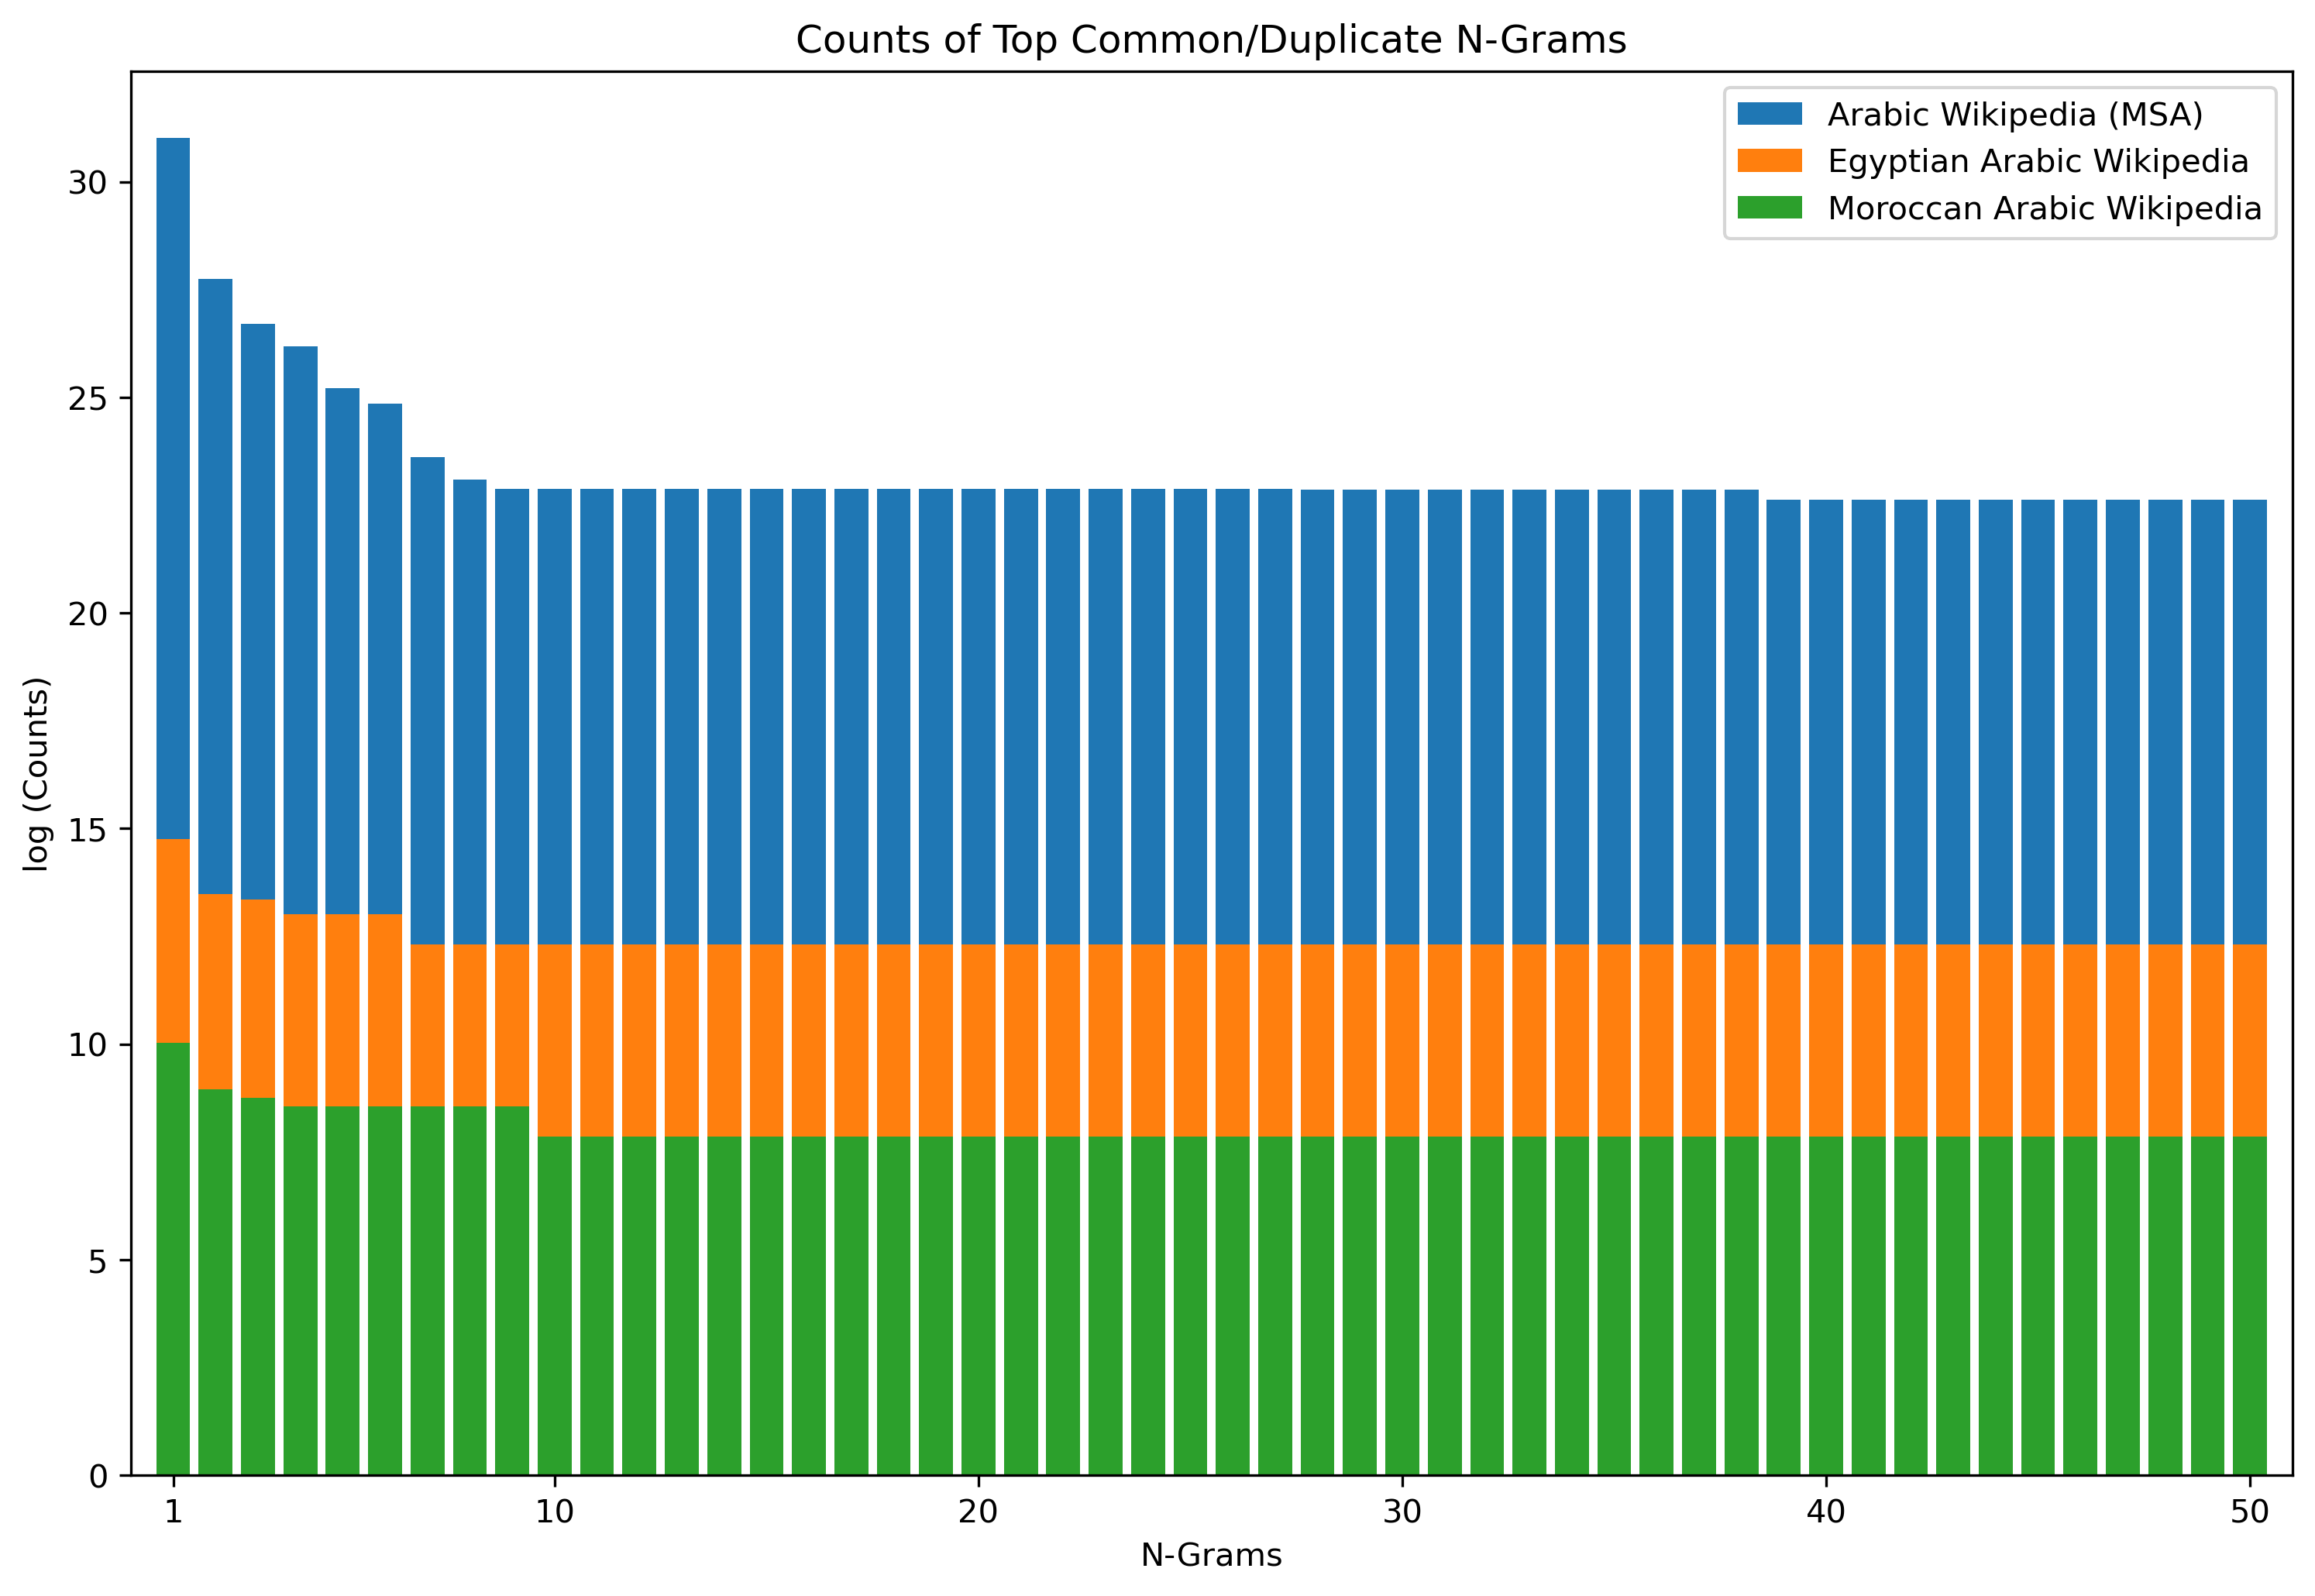

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=300)
 
plt.title("Counts of Top Common/Duplicate N-Grams")

plt.ylabel("log (Counts)")
plt.xlabel("N-Grams")

plt.bar(rN, log_rNcounts_ar, bottom=log_rNcounts_arz, lw=2, label='Arabic Wikipedia (MSA)')
plt.bar(rN, log_rNcounts_arz, lw=2, label='Egyptian Arabic Wikipedia')
plt.bar(rN, log_rNcounts_ary, lw=2, label='Moroccan Arabic Wikipedia')

plt.xticks([1, 10, 20, 30, 40, 50])
plt.xlim(0, 51)

plt.legend()

plt.savefig('charts/Duplicate-N-Grams-log.pdf', bbox_inches ="tight", facecolor ="white", dpi=300)
plt.savefig('charts/Duplicate-N-Grams-log.png', bbox_inches ="tight", facecolor ="white", dpi=300)

plt.show()